# 서울 지하철 승하차 분석하기



# < 오늘의 분석 목표 >

**1. 엑셀파일 불러오기**                                                                                                                                                                       
**2. 승차/하차를 나누어서 평균 값 구하기**                                                                                                                                                                                 
**3. 그래프로 표현해서 어느역이 가장 승/하차가 많은지 분석하기**

# 분석을 위한 패키지 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글깨짐 방지를 위한 패키지 로드

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1.엑셀 파일 불러오기 및 출력

**엑셀파일 출처 : 서울열린데이터광장                                                  
링크 : http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-12914&srvType=S&serviceKind=1&currentPageNo=1&searchValue=&searchKey=null**

In [3]:
seoul = pd.read_excel("승하차분석표.cell")

In [4]:
seoul.head()

,역명,승차총승객수,하차총승객수
0,노들,5087,4418
1,시청,29792,28938
2,동묘앞,9683,10214
3,청량리(서울시립대입구),25665,26203
4,제기동,21946,22345


# 2.승차, 하차를 나누어서 평균 값 구하기.

**<승차총승객수>**

In [5]:
승차총승객수= seoul[["역명", "승차총승객수"]] 

In [6]:
승차총승객수.head()

,역명,승차총승객수
0,노들,5087
1,시청,29792
2,동묘앞,9683
3,청량리(서울시립대입구),25665
4,제기동,21946


**<하차총승객수>**

In [7]:
하차총승객수 = seoul[["역명", "하차총승객수"]]

In [8]:
하차총승객수.head()

,역명,하차총승객수
0,노들,4418
1,시청,28938
2,동묘앞,10214
3,청량리(서울시립대입구),26203
4,제기동,22345


In [9]:
하차총승객수.mean() # 하차총승객수의 평균 값 구하기.

하차총승객수    12474.950888
dtype: float64

In [10]:
승차총승객수.mean() # 승차총승객수의 평균 값 구하기.

승차총승객수    12524.165419
dtype: float64

# 3.그래프로 표현하기.

**승차총승객수, 하차총승객수 변수는 오름차순이 아니다. 새로운 변수를 하나 생성한 뒤, 오름차순으로 만들어보자.**

In [11]:
승차_오름차순 = 승차총승객수.sort_index(by = "승차총승객수", ascending = False) # 승차총승객수 안에 승차총객수를 기준으로 오름차순으로 정렬해서
# 승차_오름차순에 대입
하차_오름차순 = 하차총승객수.sort_index(by = "하차총승객수", ascending = False) # 하차총승객수 안에 하차승객수 기준으로 오름차순으로 정렬해서
# 하차_오름차순에 대입

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
승차_오름차순.head() # 승차_오름차순 출력

,역명,승차총승객수
10830,강남,130905
2875,강남,130664
6556,강남,130396
1904,강남,125618
5868,강남,125337


In [13]:
하차_오름차순.head() # 하차_오름차순 출력

,역명,하차총승객수
6556,강남,136116
2875,강남,135633
10830,강남,135498
1904,강남,126453
9584,강남,125716


**위 승차_오름차순을 출력했을 때 중복된 것이 많다. 중복된 행을 모두 지워보자.**

In [14]:
승차_오름차순 = 승차_오름차순.drop_duplicates(["역명"]) # drop_drplicates() 함수를 이용해서 "역명"을 기준으로 중복된 것이 있으면 삭제
하차_오름차순 = 하차_오름차순.drop_duplicates(["역명"]) # 위 코드와 동일

**승차(하차)_오름차순은 행이 너무 많으니까 상위 10개만 뽑아서 다시 승차(하차)_오름차순에 대입하자.**

In [15]:
승차_오름차순 = 승차_오름차순.head(10)
하차_오름차순 = 하차_오름차순.head(10)

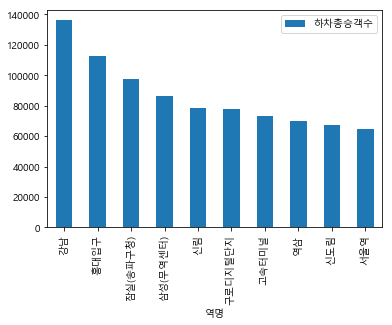

In [16]:
하차_오름차순.plot(kind="bar", x = "역명")

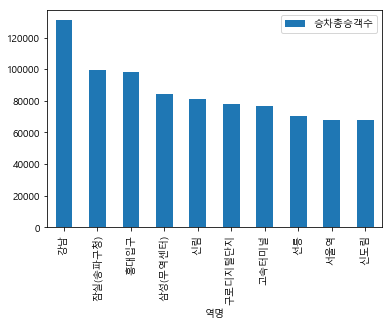

In [17]:
승차_오름차순.plot(kind = "bar", x = "역명")

# 위 그래프의 결과를 보면 하차는 강남, 홍대, 잠실이 가장 많고, 
# 승차는 강남, 잠실, 홍대가 가장 많은 것을 알 수 있다.
# 즉, 승/하차 역에 차이점은 비슷하다고 볼 수 있다.